In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# N = 12

In [11]:
N = 12
topo_type = 'PP'
func_list=['scNCF','IMR', 'BMR']

for func in func_list:
    for k in range(2,6):
        globals()[f"{func}_{N}_{k}"]= pd.read_csv(f'../input/attprops_data/N_{N}/{topo_type}/RBN_attprops_{func}_{N}_{k}_{topo_type}.tsv',sep='\t')
        globals()[f'df_{func}_{N}_{k}']=globals()[f'{func}_{N}_{k}'].drop(['attractor_length','attractor_number','attractor_basin_size'], axis=1).drop_duplicates(['network_number','model_number'],keep='last').reset_index(drop = True)
        globals()[f'att_num_{func}_{N}_{k}']=list(globals()[f'{func}_{N}_{k}'].drop_duplicates(['network_number','model_number'],keep='last').reset_index(drop = True)['attractor_number'])
        globals()[f'df_{func}_{N}_{k}']['att_num']=globals()[f'att_num_{func}_{N}_{k}']
        globals()[f'df_bushines_{func}_{N}_{k}'] = pd.read_csv(f'../input/attprops_data/N_{N}/{topo_type}/RBN_bushiness_{func}_{N}_{k}_{topo_type}.tsv', sep = '\t')
        globals()[f'df_{func}_{N}_{k}'] = globals()[f'df_{func}_{N}_{k}'].join(globals()[f'df_bushines_{func}_{N}_{k}'][['g_density', 'avg_transient_length']])
        globals()[f'df_{func}_{N}_{k}']['avg_conv_rate'] = 1/globals()[f'df_{func}_{N}_{k}']['avg_transient_length']
        globals()[f'df_derrida_{func}_{N}_{k}'] = pd.read_csv(f'../input/derrida_final_hamming_fragility/N{N}_{topo_type}/{N}_{k}_{func}_10000_derrida_{topo_type}.tsv', sep = '\t')
        globals()[f'df_{func}_{N}_{k}'] = globals()[f'df_{func}_{N}_{k}'].join(globals()[f'df_derrida_{func}_{N}_{k}'][['derrida_coeff', 'net_sen', 'final_hamming', 'fragility']])      

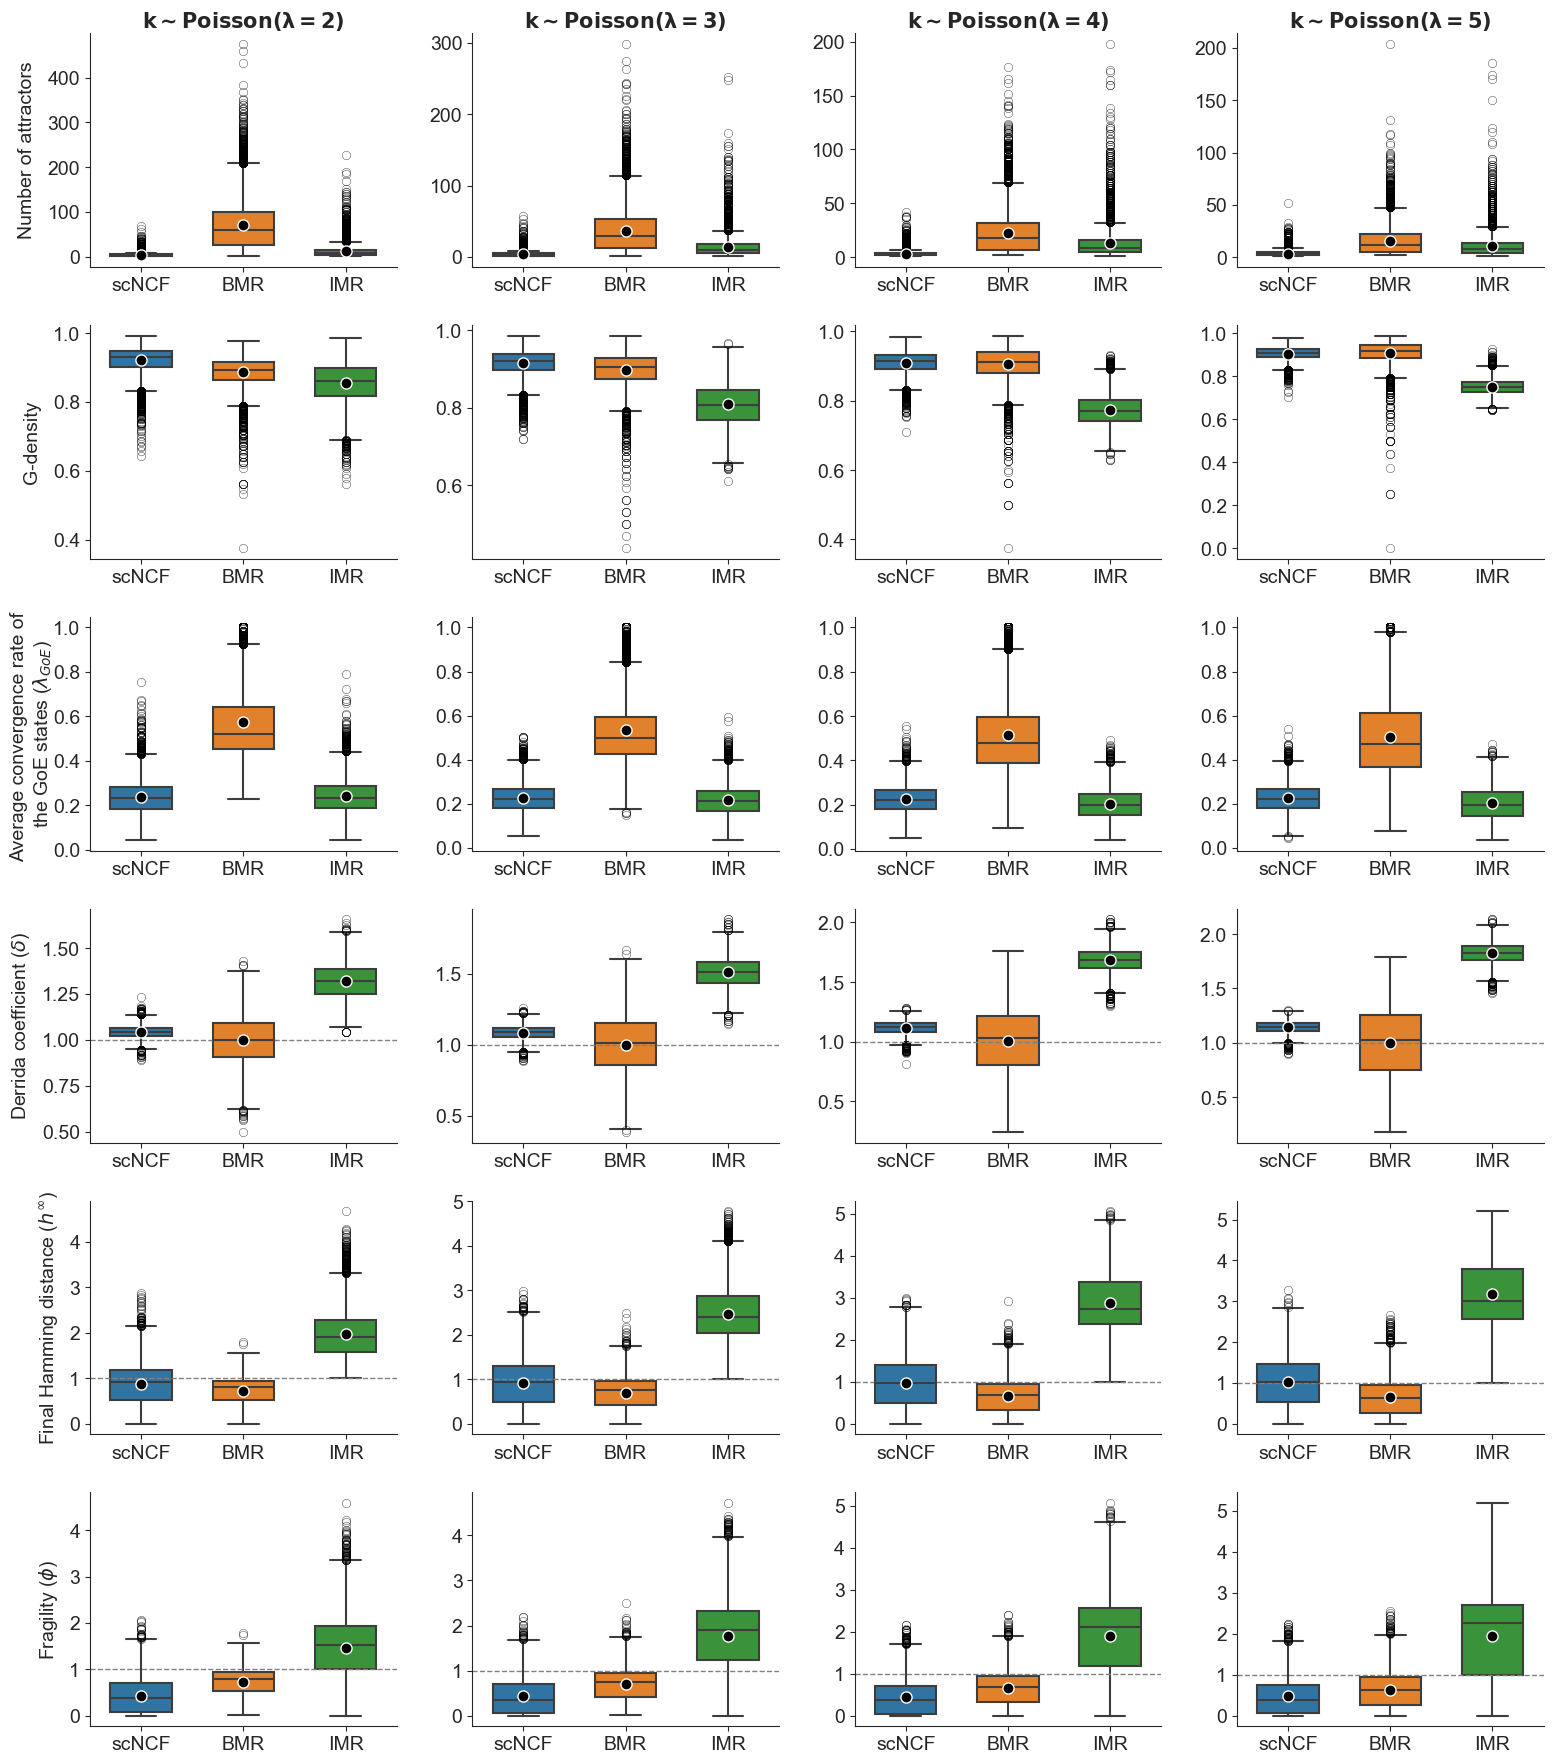

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics = ['att_num', 'g_density', 'avg_conv_rate', 'derrida_coeff', 'final_hamming', 'fragility']
ks      = [2, 3, 4, 5]


y_label_mapping = {'att_num': 'Number of attractors','g_density': 'G-density','avg_conv_rate': 'Average convergence rate of \nthe GoE states ($\\lambda_{GoE}$)',
    'derrida_coeff': r'Derrida coefficient ($\delta$)','final_hamming': r'Final Hamming distance ($h^{\infty}$)',
    'fragility': r'Fragility ($\phi$)'}

meanprops = {"marker": "o", "markerfacecolor": "black", "markeredgecolor": "white", "markersize": 8}
flierprops = {"marker": "o","markerfacecolor": "none","markeredgecolor": "black","markersize": 6, "markeredgewidth": 0.25,}

sns.set_style("white")

fig, axes = plt.subplots(nrows=len(metrics), ncols=len(ks), figsize=(4 * len(ks), 3 * len(metrics)))

last_row = len(metrics) - 1

for i, metric in enumerate(metrics):
    for j, k in enumerate(ks):
        ax = axes[i][j]
        df_names = [f"df_scNCF_{N}_{k}", f"df_BMR_{N}_{k}", f"df_IMR_{N}_{k}"]
        temp_list = []
        for name in df_names:
            df = globals().get(name)
            func_label = name.split('_')[1]
            values = df[metric].dropna().values
            temp_list.append(pd.DataFrame({'Function': func_label,'Value': values}))
        
        temp_df = pd.concat(temp_list, ignore_index=True)
        
        sns.boxplot(x='Function', y='Value', data=temp_df, ax=ax, width=0.6, showmeans=True, meanprops=meanprops, flierprops=flierprops)
        sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
        ax.set_xlabel("")  
        ax.tick_params(axis='both',which='both',direction='out',bottom=True, left=True,top=False,right=False,labelsize=14)
        ax.tick_params(axis='x', labelrotation=0, labelsize=14)
        
        if i == 0:
            if topo_type == 'PP':
                ax.set_title(r'$\mathbf{k \sim Poisson(\lambda = ' + str(k) + ')}$', fontsize=15, pad = 4)
            if topo_type == 'RR':
                ax.set_title(r'$\mathbf{k_{in} = k_{out} = ' + str(k) + '}$', fontsize=15, pad = 4)
    


        ax.set_ylabel("")
        if j == 0:
            custom_label = y_label_mapping[metric]
            ax.set_ylabel(custom_label, rotation=90, labelpad=15, fontsize=14, va='center')

target_rows = [3, 4, 5]
for row in target_rows:
    for col in range(4):
        axes[row][col].axhline(y=1, color='gray', linestyle='--', linewidth=1)
        
        
fig.tight_layout(pad=2.0)
#fig.savefig(f"../output/{N}_{topo_type}_attprops_plot.pdf", dpi=500, bbox_inches='tight')